<a href="https://colab.research.google.com/github/AfraHossain/Machine-Learning/blob/main/Image_registration_method_(Correlation)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# getting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
img_path = '/content/drive/MyDrive/Colab Notebooks/ML/camera.jpg'

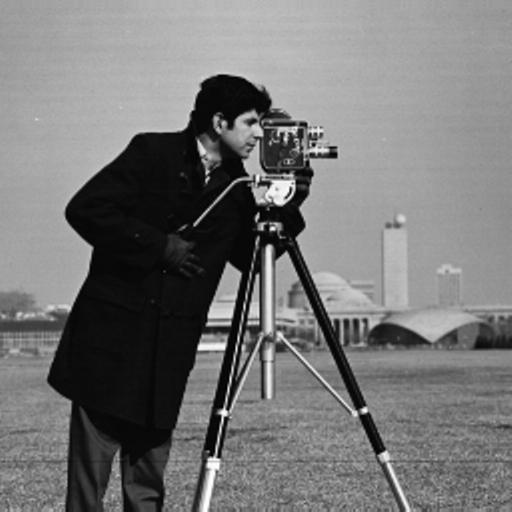

In [ ]:
# plotting image
from google.colab.patches import cv2_imshow
img= cv2.imread(img_path, 0)
cv2_imshow(img) 

In [ ]:
# Path to save images
dest = '/content/drive/MyDrive/Colab Notebooks/ML/'

In [ ]:
# taking noise and total rmse error 
noise = []
total_rmse = []
#only 1st time

In [ ]:
from skimage.util import  random_noise

In [ ]:
# Fuction for avereging filter

def avg_filtering(img):
  m, n = img.shape
  # Averaging filter
  mask = np.ones([3,3], dtype = int)
  mask = mask / 9

  #Convolve the 3*3 mask over the image 
  img_new = np.zeros([m,n])

  for i in range(1, m-1):
    for j in range(1, n-1):
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
        
        img_new[i, j]= temp
         
  img_new = img_new.astype(np.uint8)
  return img_new

(512, 512)


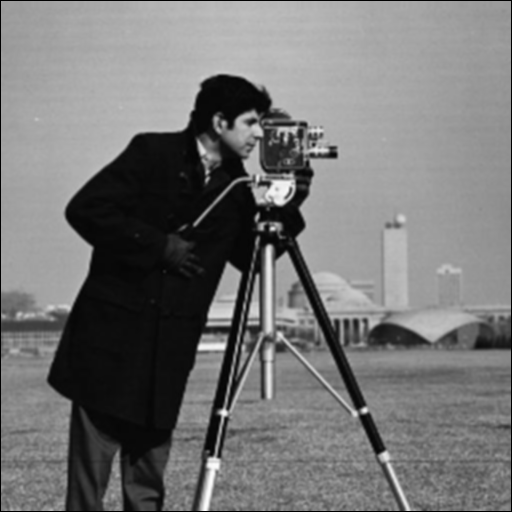

In [ ]:
# applying averaging filter to our high resolution image
smooth_img = avg_filtering(img)
print(smooth_img.shape)
cv2.imwrite(dest+'average_filtered.png', smooth_img)
cv2_imshow(smooth_img)

Adding Gaussian Noise

In [ ]:
def gaussian_noise(smooth_img, mean=0, std=40):
    """
    Args:
        image : numpy array of image
        mean : pixel mean of image
        standard deviation : pixel standard deviation of image
    Return :
        image : numpy array of image with gaussian noise added
    """
    gaus_noise = np.random.normal(mean, std, smooth_img.shape)
    smooth_img = smooth_img.astype(np.uint8)
    noise_img = smooth_img + gaus_noise
    return noise_img

In [ ]:
noise.append(40)

(512, 512)


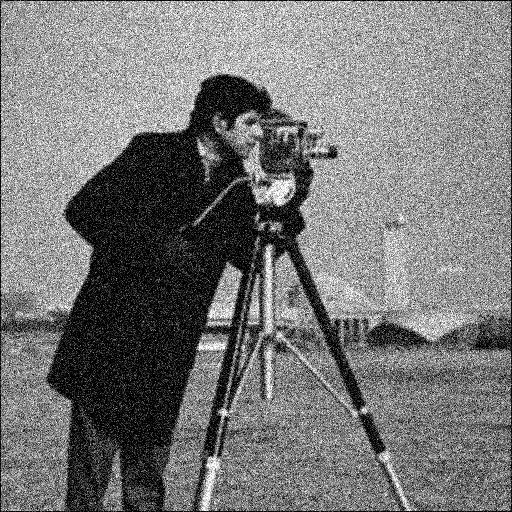

In [ ]:
smooth_img = gaussian_noise(smooth_img)
print(smooth_img.shape)
cv2.imwrite(dest+'gaussian_noise.png', smooth_img)
cv2_imshow(smooth_img)

In [ ]:
# Function subsample image 

def subsample(img, factor, start_index):
  sub_img = np.zeros(((img.shape[0]//factor)+1, (img.shape[1]//factor)+1))
  for i in range(start_index, (img.shape[0]//factor)+1):
    for j in range(start_index,(img.shape[1]//factor)+1):
      sub_img[i,j] = img[i* factor, j* factor]
  
  return sub_img

(171, 171)
(171, 171)
(171, 171)
(171, 171)
(171, 171)
(171, 171)
(171, 171)
(171, 171)
(171, 171)


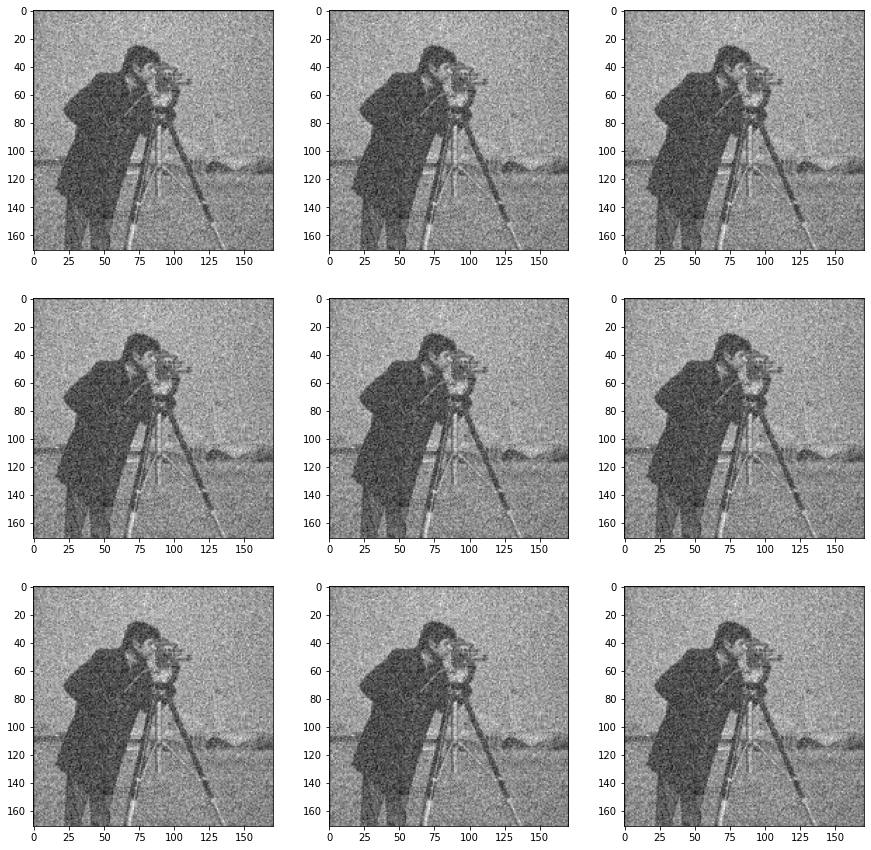

In [ ]:
# Making 9 subsample images 
# 

fig = plt.figure(figsize=(15, 15))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    # getting subsampled image
    img = subsample(smooth_img, 3, 0)
    # save that image to device
    cv2.imwrite(dest+ 'subsample_'+ str(i)+ '.png', img)
    #printing shape of subsampled image
    print(img.shape)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap= 'gray')
plt.show()

In [ ]:
# Shifting image
# x_shift: horizontal shift
#y_shift: vertical shift

def shift_image(img, x_shift, y_shift):
  rows, cols = img.shape
  matrix = np.float32([[1,0,x_shift], [0,1,y_shift]])
  shifted_img = cv2.warpAffine(img, matrix, (cols, rows))
  return shifted_img

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/ML/'

In [ ]:
# shifting image 
def translate_image(img_path, x_shift, y_shift):
  img = img_path
  img = cv2.imread(img, 0)
  s_img = shift_image(img, x_shift, y_shift)
  return s_img

In [ ]:
x_offset = [] # to store horizontal offsets
y_offset = [] # to store vertical offsets 
# run only first time 

(171, 171)


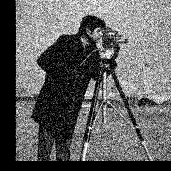

(171, 171)


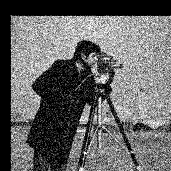

(171, 171)


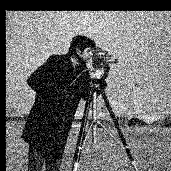

(171, 171)


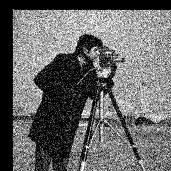

(171, 171)


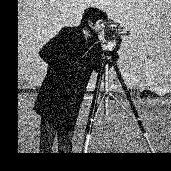

(171, 171)


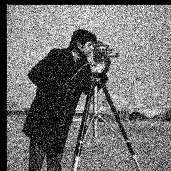

(171, 171)


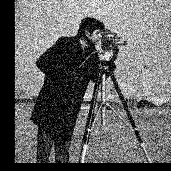

(171, 171)


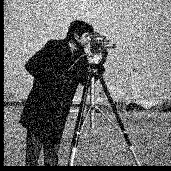

(171, 171)


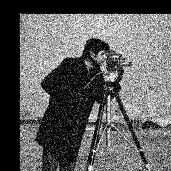

In [ ]:
# shifting images with different offsets values

# For first image 
s1_img = path+ 'subsample_1.png'
x1_offset, y1_offset = 15, -10
s1_img = translate_image(s1_img, x1_offset, y1_offset)
print(s1_img.shape)
cv2.imwrite(dest+ 'translate_1'+  '.png', s1_img)
x_offset.append(x1_offset)
y_offset.append(y1_offset)
cv2_imshow(s1_img)

# For second image 
s2_img = path+ 'subsample_2.png'
x2_offset, y2_offset = 10, 15
s2_img = translate_image(s2_img, x2_offset, y2_offset)
print(s2_img.shape)
cv2.imwrite(dest+ 'translate_2'+  '.png', s2_img)
x_offset.append(x2_offset)
y_offset.append(y2_offset)
cv2_imshow(s2_img)

# For third image 
s3_img = path+ 'subsample_3.png'
x3_offset, y3_offset = 5, 10
s3_img = translate_image(s3_img, x3_offset, y3_offset)
print(s3_img.shape)
cv2.imwrite(dest+ 'translate_3'+  '.png', s3_img)
x_offset.append(x3_offset)
y_offset.append(y3_offset)
cv2_imshow(s3_img)

# For fourth image 
s4_img = path+ 'subsample_4.png'
x4_offset, y4_offset = 12, 9
s4_img = translate_image(s4_img, x4_offset, y4_offset)
print(s4_img.shape)
cv2.imwrite(dest+ 'translate_4'+  '.png', s4_img)
x_offset.append(x4_offset)
y_offset.append(y4_offset)
cv2_imshow(s4_img)

# For fifth image 
s5_img = path+ 'subsample_5.png'
x5_offset, y5_offset = 17, -18
s5_img = translate_image(s5_img, x5_offset, y5_offset)
print(s5_img.shape)
cv2.imwrite(dest+ 'translate_5'+  '.png', s5_img)
x_offset.append(x5_offset)
y_offset.append(y5_offset)
cv2_imshow(s5_img)


# For sisxth image 
s6_img = path+ 'subsample_6.png'
x6_offset, y6_offset = 6, 4
s6_img = translate_image(s6_img, x6_offset, y6_offset)
print(s6_img.shape)
cv2.imwrite(dest+ 'translate_6'+  '.png', s6_img)
x_offset.append(x6_offset)
y_offset.append(y6_offset)
cv2_imshow(s6_img)


# For seventh image 
s7_img = path+ 'subsample_7.png'
x7_offset, y7_offset = 14, -8
s7_img = translate_image(s7_img, x7_offset, y7_offset)
print(s7_img.shape)
cv2.imwrite(dest+ 'translate_7'+  '.png', s7_img)
x_offset.append(x7_offset)
y_offset.append(y7_offset)
cv2_imshow(s7_img)


# For eigth image 
s8_img = path+ 'subsample_8.png'
x8_offset, y8_offset = 3,-5
s8_img = translate_image(s8_img, x8_offset, y8_offset)
print(s8_img.shape)
cv2.imwrite(dest+ 'translate_8'+  '.png', s8_img)
x_offset.append(x8_offset)
y_offset.append(y8_offset)
cv2_imshow(s8_img)


# For ninth image 
s9_img = path+ 'subsample_9.png'
x9_offset, y9_offset = 19, 13
s9_img = translate_image(s9_img, x9_offset, y9_offset)
print(s9_img.shape)
cv2.imwrite(dest+ 'translate_9'+  '.png', s9_img)
x_offset.append(x9_offset)
y_offset.append(y9_offset)
cv2_imshow(s9_img)


In [ ]:
print(x_offset)
print(y_offset)

[15, 10, 5, 12, 17, 6, 14, 3, 19]
[-10, 15, 10, 9, -18, 4, -8, -5, 13]


# Correlation Metods 

Correlation using equation(1) in the papaer

In [ ]:
# Getting correlation using equation 1 in paper
def get_correlation_v1(original_img, shifted_img):
  rows, cols = original_img.shape
  cor_matrix = np.zeros((rows, cols))
  for i in range(0, rows):
    for j in range(0, cols):
      cor_matrix[i,j] = np.sum(np.multiply(original_img[i,j], shifted_img[i, j]))
  
  #return cor_matrix
  indices = np.where(cor_matrix == cor_matrix.max())
  max_value = cor_matrix[indices]
  indexes = np.argwhere(cor_matrix == cor_matrix.max())
  return max_value, indexes


(171, 171)
(171, 171)
Reference Image: 


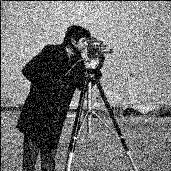

Offset Image: 


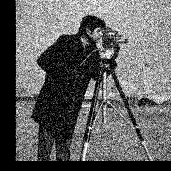

Offset image translated by: ( 15 ,  -10 )
Max Values: 
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]
Indexes: 
 [[  1 119]
 [  1 140]
 [  3 165]
 [  4  92]
 [ 10 137]
 [ 12  41]
 [ 15  74]
 [ 17  75]
 [ 19  60]
 [ 23  71]
 [ 23 141]
 [ 30  78]
 [ 31 151]
 [ 37  82]
 [ 37 134]
 [ 38  19]
 [ 38  33]
 [ 39  23]
 [ 39 148]
 [ 40 131]
 [ 41  95]
 [ 42  46]
 [ 44 122]
 [ 50 107]
 [ 55 148]
 [ 58  58]
 [ 59  60]
 [ 60 135]
 [ 62 153]
 [ 63  43]
 [ 63  94]
 [ 63 102]
 [ 75  17]
 [ 80  55]
 [ 82 167]
 [ 89 166]
 [ 91 105]
 [ 92  38]
 [ 92  85]
 [ 97 145]
 [104 137]
 [110  70]
 [112  45]
 [120  37]
 [120 136]
 [121 145]
 [123 131]
 [134  55]
 [138 154]
 [142  24]
 [146  78]
 [149  69]
 [156  54]
 [156 147]]
-----------------------------------------------
(171, 171)
(171

In [ ]:
ref_img_1 = path+ 'subsample_1.png'
offset_img_1 = path+ 'translate_1.png'

ref_img_1 = cv2.imread(ref_img_1, 0)
print(ref_img_1.shape)

offset_img_1 = cv2.imread(offset_img_1, 0)
print(offset_img_1.shape)
print('Reference Image: ')
cv2_imshow(ref_img_1)
print('Offset Image: ')
cv2_imshow(offset_img_1)
print('Offset image translated by: (', x_offset[0], ', ', y_offset[0], ')')
max_value_1, indexes_1 = get_correlation_v1(ref_img_1, offset_img_1)
print('Max Values: \n', max_value_1)
print("Indexes: \n", indexes_1)
print('-----------------------------------------------')

ref_img_2 = path+ 'subsample_2.png'
offset_img_2 = path+ 'translate_2.png'

ref_img_2 = cv2.imread(ref_img_2, 0)
print(ref_img_2.shape)

offset_img_2 = cv2.imread(offset_img_2, 0)
print(offset_img_2.shape)
print('Offset image translated by: (', x_offset[1], ', ', y_offset[2], ')')
max_value_2, indexes_2 = get_correlation_v1(ref_img_2, offset_img_2)
print('Max Values: \n', max_value_2)
print("Indexes: \n", indexes_2)
print('-----------------------------------------------')

ref_img_3 = path+ 'subsample_3.png'
offset_img_3 = path+ 'translate_3.png'

ref_img_3 = cv2.imread(ref_img_3, 0)
print(ref_img_3.shape)

offset_img_3 = cv2.imread(offset_img_3, 0)
print(offset_img_3.shape)
print('Offset image translated by: (', x_offset[2], ', ', y_offset[2], ')')
max_value_3, indexes_3 = get_correlation_v1(ref_img_3, offset_img_3)
print('Max Values: \n', max_value_3)
print("Indexes: \n", indexes_3)
print('-----------------------------------------------')
 
ref_img_4 = path+ 'subsample_4.png'
offset_img_4 = path+ 'translate_4.png'

ref_img_4 = cv2.imread(ref_img_4, 0)
print(ref_img_4.shape)

offset_img_4 = cv2.imread(offset_img_4, 0)
print(offset_img_4.shape)
print('Offset image translated by: (', x_offset[3], ', ', y_offset[3], ')')
max_value_4, indexes_4 = get_correlation_v1(ref_img_4, offset_img_4)
print('Max Values: \n', max_value_4)
print("Indexes: \n", indexes_4)
print('-----------------------------------------------')
 
ref_img_5 = path+ 'subsample_5.png'
offset_img_5 = path+ 'translate_5.png'

ref_img_5 = cv2.imread(ref_img_5, 0)
print(ref_img_5.shape)

offset_img_5 = cv2.imread(offset_img_5, 0)
print(offset_img_5.shape)
print('Offset image translated by: (', x_offset[4], ', ', y_offset[4], ')')
max_value_5, indexes_5 = get_correlation_v1(ref_img_5, offset_img_5)
print('Max Values: \n', max_value_5)
print("Indexes: \n", indexes_5)
print('-----------------------------------------------')

ref_img_6 = path+ 'subsample_6.png'
offset_img_6 = path+ 'translate_6.png'

ref_img_6 = cv2.imread(ref_img_6, 0)
print(ref_img_6.shape)

offset_img_6 = cv2.imread(offset_img_6, 0)
print(offset_img_6.shape)
print('Offset image translated by: (', x_offset[5], ', ', y_offset[5], ')')
max_value_6, indexes_6 = get_correlation_v1(ref_img_6, offset_img_6)
print('Max Values: \n', max_value_6)
print("Indexes: \n", indexes_6)
print('-----------------------------------------------')

ref_img_7 = path+ 'subsample_7.png'
offset_img_7 = path+ 'translate_7.png'

ref_img_7 = cv2.imread(ref_img_7, 0)
print(ref_img_7.shape)

offset_img_7 = cv2.imread(offset_img_7, 0)
print(offset_img_7.shape)
print('Offset image translated by: (', x_offset[6], ', ', y_offset[6], ')')
max_value_7, indexes_7 = get_correlation_v1(ref_img_7, offset_img_7)
print('Max Values: \n', max_value_7)
print("Indexes: \n", indexes_7)
print('-----------------------------------------------')

ref_img_8 = path+ 'subsample_8.png'
offset_img_8 = path+ 'translate_8.png'

ref_img_8 = cv2.imread(ref_img_8, 0)
print(ref_img_8.shape)

offset_img_8 = cv2.imread(offset_img_8, 0)
print(offset_img_8.shape)
print('Offset image translated by: (', x_offset[7], ', ', y_offset[7], ')')
max_value_8, indexes_8 = get_correlation_v1(ref_img_8, offset_img_8)
print('Max Values: \n', max_value_8)
print("Indexes: \n", indexes_8)
print('-----------------------------------------------')

ref_img_9 = path+ 'subsample_9.png'
offset_img_9 = path+ 'translate_9.png'

ref_img_9 = cv2.imread(ref_img_9, 0)
print(ref_img_8.shape)

offset_img_9 = cv2.imread(offset_img_9, 0)
print(offset_img_9.shape)
print('Offset image translated by: (', x_offset[8], ', ', y_offset[8], ')')
max_value_9, indexes_9 = get_correlation_v1(ref_img_9, offset_img_9)
print('Max Values: \n', max_value_9)
print("Indexes: \n", indexes_9)
print('-----------------------------------------------')

Correlation method 2 using covariance and standard deviation

In [ ]:
# Function using theory of correlation

def get_correlation(original_img, shifted_img):
  # calculating rows and columns 
  rows, cols = original_img.shape

  # Calculating mean of original image 
  x_mean = np.mean(original_img)

  # Calculating mean of shifted image 
  y_mean = np.mean(shifted_img)

  cor_matrix = np.zeros((rows, cols))
  for i in range(rows):
    for j in range(cols):
      x_sub = original_img[i][j] - x_mean
      # calculating varaiance of x
      x_var = np.sum(np.square(x_sub)) / (original_img.shape[0] - 1)
      #calcualting standard deviation 
      x_std = np.sqrt(x_var)
      
      y_sub = shifted_img[i][j] - y_mean
      # calcualting varaince for y
      y_var = np.sum(np.square(y_sub)) / (original_img.shape[0] - 1)
      # calculating standard deviation
      y_std = np.sqrt(y_var)

      # Calculating covariance
      cov = np.sum(x_sub * y_sub) / original_img.shape[0]

      cor = cov / (x_std * y_std)
      cor_matrix[i][j] = cor

  #return cor_matrix
  indices = np.where(cor_matrix == cor_matrix.max())
  max_value = cor_matrix[indices]
  indexes = np.argwhere(cor_matrix == cor_matrix.max())
  return cor_matrix, max_value, indexes



(171, 171)
(171, 171)
Reference Image: 


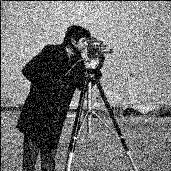

Offset Image: 


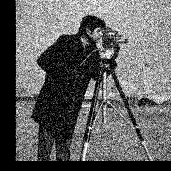

Offset image translated by: ( 15 ,  -10 )
Max Values: 
 [0.99415205 0.99415205 0.99415205 0.99415205 0.99415205 0.99415205
 0.99415205 0.99415205 0.99415205 0.99415205 0.99415205 0.99415205
 0.99415205 0.99415205 0.99415205 0.99415205 0.99415205 0.99415205
 0.99415205 0.99415205 0.99415205 0.99415205 0.99415205 0.99415205
 0.99415205 0.99415205 0.99415205]
Indexes: 
 [[  1 131]
 [ 10  52]
 [ 12  92]
 [ 14  63]
 [ 16 141]
 [ 16 160]
 [ 17 133]
 [ 18  79]
 [ 21 134]
 [ 28 167]
 [ 38  26]
 [ 42  88]
 [ 42 137]
 [ 55  22]
 [ 63 125]
 [ 64 125]
 [ 65  72]
 [ 84  90]
 [ 85 167]
 [ 91 141]
 [108 139]
 [112 134]
 [130 151]
 [148  63]
 [148 160]
 [151 124]
 [157  27]]
-----------------------------------------------
(171, 171)
(171, 171)
Offset image translated by: ( 10 ,  15 )
Max Values: 
 [0.99415205 0.99415205 0.99415205 0.99415205 0.99415205 0.99415205
 0.99415205 0.99415205 0.99415205 0.99415205 0.99415205 0.99415205
 0.99415205 0.99415205 0.99415205 0.99415205 0.99415205 0.99415205
 0.994

In [ ]:
ref_img_1 = path+ 'subsample_1.png'
offset_img_1 = path+ 'translate_1.png'

ref_img_1 = cv2.imread(ref_img_1, 0)
print(ref_img_1.shape)

offset_img_1 = cv2.imread(offset_img_1, 0)
print(offset_img_1.shape)
print('Reference Image: ')
cv2_imshow(ref_img_1)
print('Offset Image: ')
cv2_imshow(offset_img_1)
print('Offset image translated by: (', x_offset[0], ', ', y_offset[0], ')')
cor_matrix_1, max_value_1, indexes_1 = get_correlation(ref_img_1, offset_img_1)
print('Max Values: \n', max_value_1)
print("Indexes: \n", indexes_1)
print('-----------------------------------------------')

ref_img_2 = path+ 'subsample_2.png'
offset_img_2 = path+ 'translate_2.png'

ref_img_2 = cv2.imread(ref_img_2, 0)
print(ref_img_2.shape)

offset_img_2 = cv2.imread(offset_img_2, 0)
print(offset_img_1.shape)
print('Offset image translated by: (', x_offset[1], ', ', y_offset[1], ')')
cor_matrix_2, max_value_2, indexes_2 = get_correlation(ref_img_2, offset_img_2)
print('Max Values: \n', max_value_2)
print("Indexes: \n", indexes_2)
print('-----------------------------------------------')

ref_img_3 = path+ 'subsample_3.png'
offset_img_3 = path+ 'translate_3.png'

ref_img_3 = cv2.imread(ref_img_3, 0)
print(ref_img_3.shape)

offset_img_3 = cv2.imread(offset_img_3, 0)
print(offset_img_3.shape)
print('Offset image translated by: (', x_offset[2], ', ', y_offset[2], ')')
cor_matrix_3, max_value_3, indexes_3 = get_correlation(ref_img_3, offset_img_3)
print('Max Values: \n', max_value_3)
print("Indexes: \n", indexes_3)
print('-----------------------------------------------')
 
ref_img_4 = path+ 'subsample_4.png'
offset_img_4 = path+ 'translate_4.png'

ref_img_4 = cv2.imread(ref_img_4, 0)
print(ref_img_4.shape)

offset_img_4 = cv2.imread(offset_img_4, 0)
print(offset_img_4.shape)
print('Offset image translated by: (', x_offset[3], ', ', y_offset[3], ')')
cor_matrix_4, max_value_4, indexes_4 = get_correlation(ref_img_4, offset_img_4)
print('Max Values: \n', max_value_4)
print("Indexes: \n", indexes_4)
print('-----------------------------------------------')
 
ref_img_5 = path+ 'subsample_5.png'
offset_img_5 = path+ 'translate_5.png'

ref_img_5 = cv2.imread(ref_img_5, 0)
print(ref_img_5.shape)

offset_img_5 = cv2.imread(offset_img_5, 0)
print(offset_img_5.shape)
print('Offset image translated by: (', x_offset[4], ', ', y_offset[4], ')')
cor_matrix_5, max_value_5, indexes_5 = get_correlation(ref_img_5, offset_img_5)
print('Max Values: \n', max_value_5)
print("Indexes: \n", indexes_5)
print('-----------------------------------------------')

ref_img_6 = path+ 'subsample_6.png'
offset_img_6 = path+ 'translate_6.png'

ref_img_6 = cv2.imread(ref_img_6, 0)
print(ref_img_6.shape)

offset_img_6 = cv2.imread(offset_img_6, 0)
print(offset_img_6.shape)
print('Offset image translated by: (', x_offset[5], ', ', y_offset[5], ')')
cor_matrix_6, max_value_6, indexes_6 = get_correlation(ref_img_6, offset_img_6)
print('Max Values: \n', max_value_6)
print("Indexes: \n", indexes_6)
print('-----------------------------------------------')

ref_img_7 = path+ 'subsample_7.png'
offset_img_7 = path+ 'translate_7.png'

ref_img_7 = cv2.imread(ref_img_7, 0)
print(ref_img_7.shape)

offset_img_7 = cv2.imread(offset_img_7, 0)
print(offset_img_7.shape)
print('Offset image translated by: (', x_offset[6], ', ', y_offset[6], ')')
cor_matrix_7, max_value_7, indexes_7 = get_correlation(ref_img_7, offset_img_7)
print('Max Values: \n', max_value_7)
print("Indexes: \n", indexes_7)
print('-----------------------------------------------')

ref_img_8 = path+ 'subsample_8.png'
offset_img_8 = path+ 'translate_8.png'

ref_img_8 = cv2.imread(ref_img_8, 0)
print(ref_img_8.shape)

offset_img_8 = cv2.imread(offset_img_8, 0)
print(offset_img_8.shape)
print('Offset image translated by: (', x_offset[7], ', ', y_offset[7], ')')
cor_matrix_8, max_value_8, indexes_8 = get_correlation(ref_img_8, offset_img_8)
print('Max Values: \n', max_value_8)
print("Indexes: \n", indexes_8)
print('-----------------------------------------------')

ref_img_9 = path+ 'subsample_9.png'
offset_img_9 = path+ 'translate_9.png'

ref_img_9 = cv2.imread(ref_img_9, 0)
print(ref_img_8.shape)

offset_img_9 = cv2.imread(offset_img_9, 0)
print(offset_img_9.shape)
print('Offset image translated by: (', x_offset[8], ', ', y_offset[8], ')')
cor_matrix_9, max_value_9, indexes_9 = get_correlation(ref_img_9, offset_img_9)
print('Max Values: \n', max_value_9)
print("Indexes: \n", indexes_9)
print('-----------------------------------------------')